In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import timeit

4. Рассчитайте сколько сотрудников работает в каждом департаменте.
5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности


In [67]:
# matplotlib params

plt.rcParams.update({'font.size': 14})

In [4]:
# 1. Загрузите файл HR.csv в pandas dataframe

hr_df = pd.read_csv('HR.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Признаки:

1.satisfaction_level​ - Уровень удовлетворенности работой

2.Last_evaluation ​- Время с момента последней оценки в годах

3.number_projects​ - Количество проектов, выполненных за время работы

4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц

5.time_spend_company​ - Стаж работы в компании в годах

6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником

7.left​ - уволился ли сотрудник

8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет

9.department ​- отдел в котором работает сотрудник

10.salary​ - относительный уровень зарплаты

In [20]:
# 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

#Способ 1
# %timeit employee_by_dep = pd.DataFrame(hr_df['department'].value_counts())
employee_by_dep = pd.DataFrame(hr_df['department'].value_counts())
employee_by_dep.reset_index(inplace=True)
employee_by_dep.columns = ['department', 'number_of_employee']
employee_by_dep

,department,number_of_employee
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


In [33]:
#Способ 2
# %timeit hr_df.groupby(['department'])['satisfaction_level'].count()
employee_by_dep2 = pd.DataFrame(hr_df.groupby(['department'])['satisfaction_level'].count())\
    .sort_values(by='satisfaction_level', ascending=False)
employee_by_dep2.reset_index(inplace=True)
employee_by_dep2.columns = ['department', 'number_of_employee']
employee_by_dep2

,department,number_of_employee
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


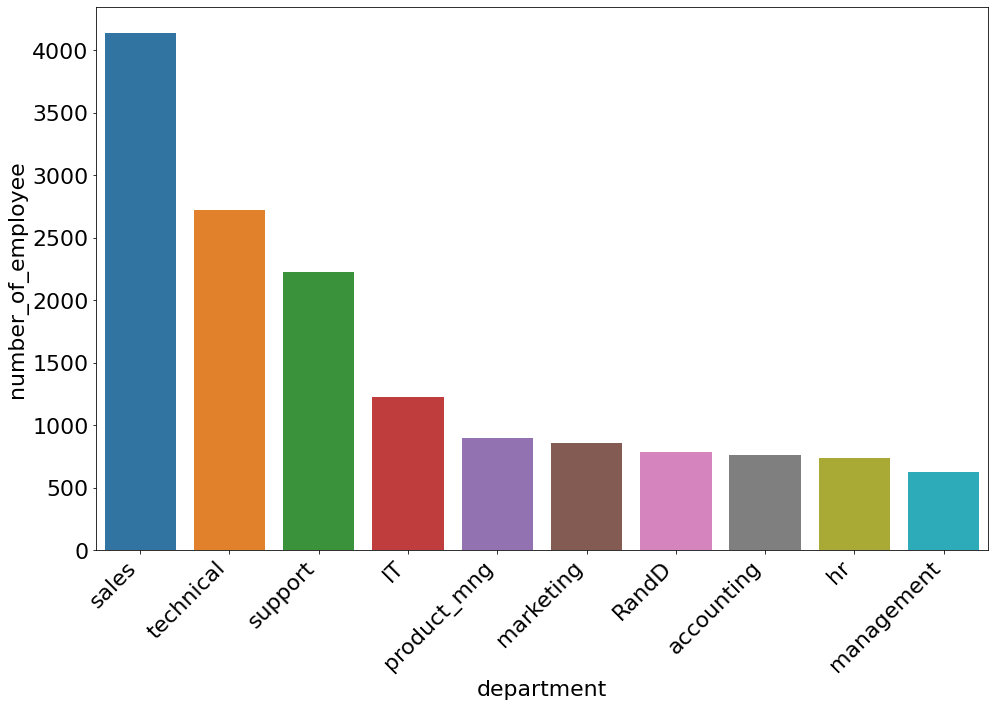

In [34]:
fig = plt.figure(figsize=(16,10))
sns.barplot(x=employee_by_dep2['department'], y=employee_by_dep2['number_of_employee'])
plt.xticks(rotation=45, ha='right')

plt.show()

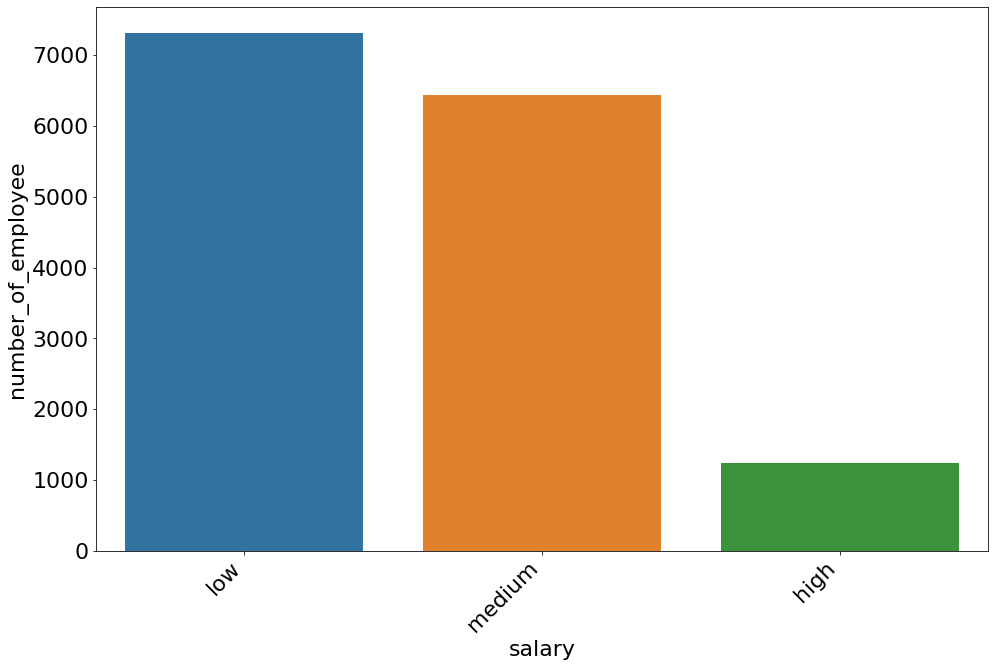

In [45]:
# 5. Показать распределение сотрудников по зарплатам.

employee_by_salary = pd.DataFrame(hr_df.groupby(['salary'])['satisfaction_level'].count())\
    .sort_values(by='satisfaction_level', ascending=False)
employee_by_salary.reset_index(inplace=True)
employee_by_salary.rename(columns={'satisfaction_level': 'number_of_employee'}, inplace=True)

fig = plt.figure(figsize=(16,10))
sns.barplot(x=employee_by_salary['salary'], y=employee_by_salary['number_of_employee'])
plt.xticks(rotation=45, ha='right')

plt.show()


In [66]:
# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

employee_by_salary_dep = pd.DataFrame(hr_df.groupby(['department' ,'salary'])['satisfaction_level'].count())\
    .sort_values(by='satisfaction_level', ascending=False)
employee_by_salary_dep.rename(columns={'satisfaction_level': 'number_of_employee'}, inplace=True)
employee_by_salary_dep = employee_by_salary_dep.unstack()
employee_by_salary_dep.rename(columns={'high':'high_salary', 'low':'low_salary', 'medium':'medium_salary'}, inplace=True)
employee_by_salary_dep

number_of_employee                         
salary             high_salary low_salary medium_salary
department                                             
IT                          83        609           535
RandD                       51        364           372
accounting                  74        358           335
hr                          45        335           359
management                 225        180           225
marketing                   80        402           376
product_mng                 68        451           383
sales                      269       2099          1772
support                    141       1146           942
technical                  201       1372          1147

<Figure size 432x288 with 0 Axes>

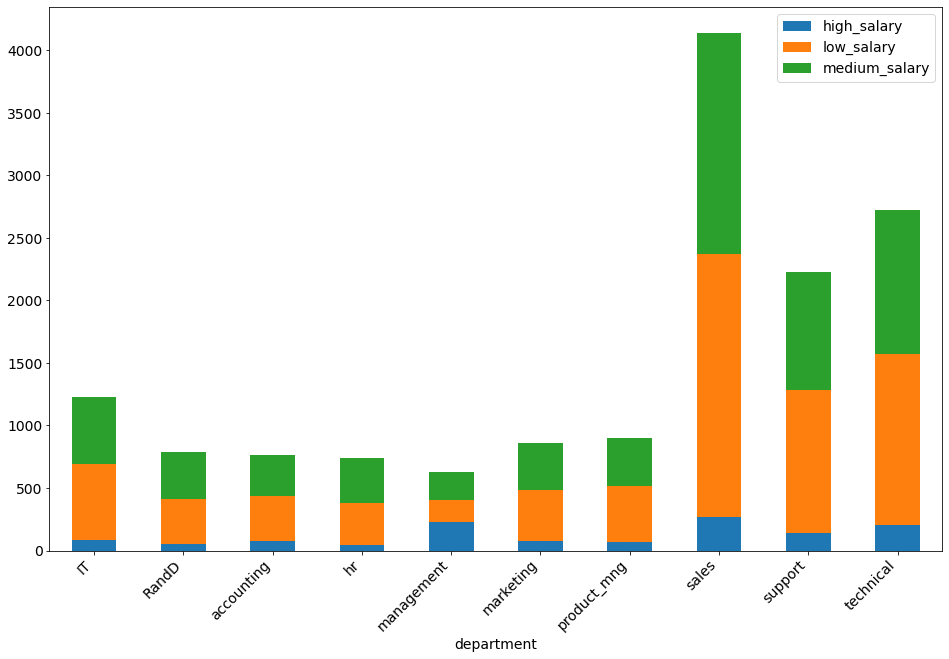

In [89]:
labels = [x[1] for x in employee_by_salary_dep.columns]


fig= plt.figure()

employee_by_salary_dep.plot.bar(stacked=True, figsize=(16,10))

plt.xticks(rotation=45, ha='right')
plt.legend(labels)

plt.show()